<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/TM_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
solar = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/Sunspots.csv')
solar.head(2)

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3


In [ ]:
solar.index = solar['Date']
solar.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
solar.head(2)

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3


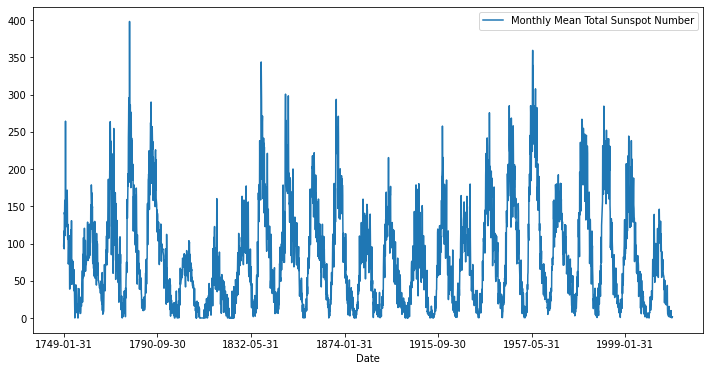

In [ ]:
solar.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(solar['Monthly Mean Total Sunspot Number'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-10.480868432669848,
 1.2147141586504414e-18,
 28,
 3223,
 {'1%': -3.4323805665026175,
  '10%': -2.5672475896829807,
  '5%': -2.8624371819849372},
 29726.17960863342)

In [ ]:
xampu = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/shampoo.csv')
xampu.head(2)

,Month,Sales
0,1-01,266.0
1,1-02,145.9


In [ ]:
xampu.index = xampu['Month']
xampu.drop(['Month'],axis=1,inplace=True)
xampu.head(2)

,Sales
Month,
1-01,266.0
1-02,145.9


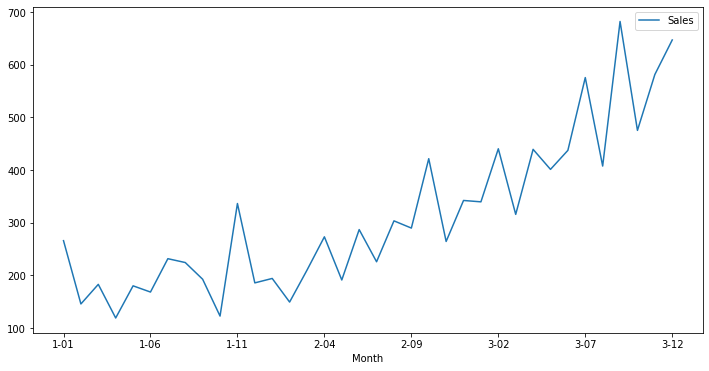

In [ ]:
xampu.plot(figsize=(12,6))

In [ ]:
adfuller(xampu['Sales'])

(3.0601420836411823,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '10%': -2.6328004, '5%': -2.98648896},
 278.9972644263031)

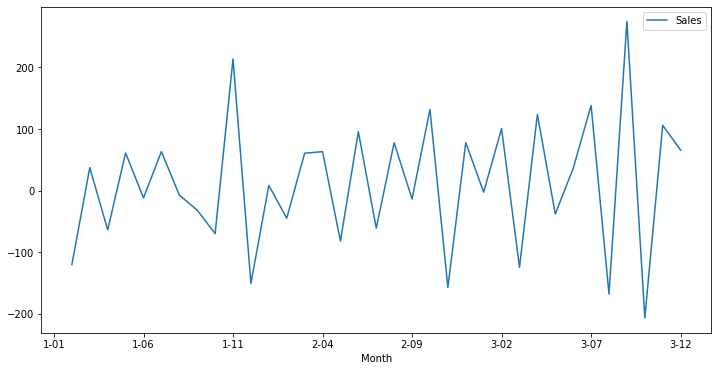

In [ ]:
xampuok = xampu.diff()
xampuok.plot(figsize=(12,6))

In [ ]:
xampuok.dropna(inplace=True)
adfuller(xampuok['Sales'])

(-7.249074055553857,
 1.7998574141686703e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '10%': -2.6159676124885216,
  '5%': -2.954126991123355},
 275.32503579406307)

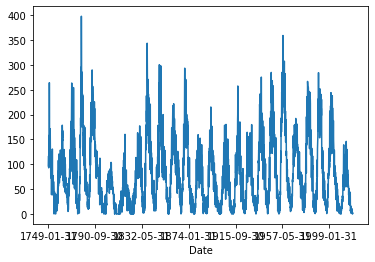

In [ ]:
solar['Monthly Mean Total Sunspot Number'].plot()

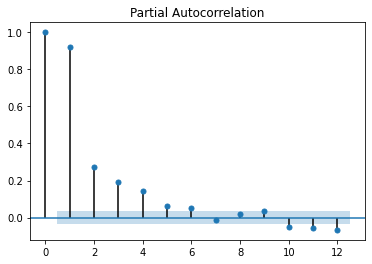

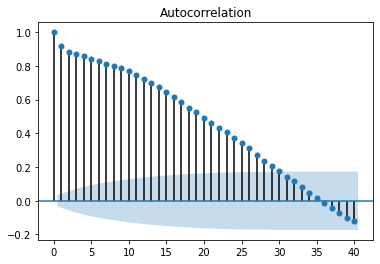

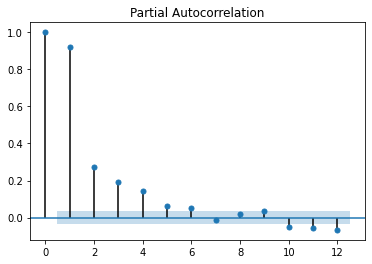

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(solar,lags=40)
plot_pacf(solar,lags=12)

ARIMA = (4,0,1)

[4.22401444]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[5.78029188]
[7.0467063]
[8.28791441]
[9.59176915]
[10.89155428]
[12.16147334]
[13.40126434]
[14.61797721]
[15.81305225]
[16.98751472]
[18.14121686]
[19.27400147]
[20.38659242]
[21.47874968]
[22.55107104]
[23.60437602]
[24.63897506]
[25.65440794]
[26.65192326]


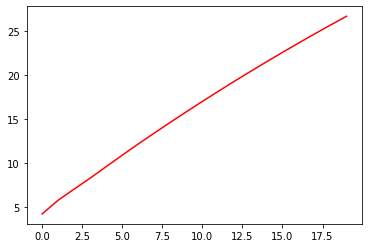

In [ ]:
sol = [x for x in solar['Monthly Mean Total Sunspot Number']]

from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

prevs = list()
for t in range(20):
  arima = ARIMA(sol, order=(4,0,1) )
  modelo =  arima.fit(disp=0)
  out = modelo.forecast()
  yhat = out[0]
  prevs.append(yhat)
  sol.append(yhat)
  print(yhat)

plt.plot(prevs,color='red')

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm 
model=pm.auto_arima(solar['Monthly Mean Total Sunspot Number'],m=11,seasonal=True,start_q=0,start_p=0,max_order=5,error_action='ignore',stepwise=True,trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[11] intercept   : AIC=33844.892, Time=6.16 sec
 ARIMA(0,0,0)(0,0,0)[11] intercept   : AIC=36662.504, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[11] intercept   : AIC=30651.060, Time=4.27 sec
 ARIMA(0,0,1)(0,0,1)[11] intercept   : AIC=33078.193, Time=4.44 sec
 ARIMA(0,0,0)(0,0,0)[11]             : AIC=39591.690, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[11] intercept   : AIC=30655.087, Time=0.28 sec
 ARIMA(1,0,0)(2,0,0)[11] intercept   : AIC=30652.587, Time=14.49 sec
 ARIMA(1,0,0)(1,0,1)[11] intercept   : AIC=30652.715, Time=4.51 sec
 ARIMA(1,0,0)(0,0,1)[11] intercept   : AIC=30651.231, Time=3.43 sec
 ARIMA(1,0,0)(2,0,1)[11] intercept   : AIC=30654.714, Time=17.23 sec
 ARIMA(0,0,0)(1,0,0)[11] intercept   : AIC=33995.544, Time=3.21 sec
 ARIMA(2,0,0)(1,0,0)[11] intercept   : AIC=30402.095, Time=5.39 sec
 ARIMA(2,0,0)(0,0,0)[11] intercept   : AIC=30404.772, Time=0.29 sec
 ARIMA(2,0,0)(2,0,0)[11] intercept   : AIC=30403.887, Time=19.55 sec
 A